In [1]:
import pandas as pd
import numpy as np

import decoupler as dc
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
!wget 'https://zenodo.org/record/7035528/files/knockTF_expr.csv?download=1' -O /Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv
!wget 'https://zenodo.org/record/7035528/files/knockTF_meta.csv?download=1' -O /Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv

--2022-10-04 11:48:29--  https://zenodo.org/record/7035528/files/knockTF_expr.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146086808 (139M) [text/plain]
Saving to: ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv’

/Users/smuellerdott 100%[===================>] 139,32M  28,0MB/s    in 5,7s    

2022-10-04 11:48:35 (24,4 MB/s) - ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv’ saved [146086808/146086808]

--2022-10-04 11:48:36--  https://zenodo.org/record/7035528/files/knockTF_meta.csv?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144861 (141K) [text/plain]
Saving to: ‘/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv’

/Users/smuellerdott 100

In [2]:
mat = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_expr.csv', index_col=0)
obs = pd.read_csv('/Users/smuellerdott/Documents/NTNUdecoupleR/data/knockTF_meta.csv', index_col=0)

In [3]:
mat

,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AA06,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
DataSet_01_001,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,-0.033220,-0.046900,-0.143830,0.00000
DataSet_01_002,-0.173750,0.000000,-0.537790,-0.4424,-1.596640,-0.00010,-0.08260,-3.64590,0.0,0.0,...,0.000000,0.39579,0.000000,0.086110,0.28574,-0.130210,-0.276640,-0.881580,0.812950,0.47896
DataSet_01_003,-0.216130,0.000000,-0.220270,-0.0008,0.000000,0.15580,-0.35802,-0.32025,0.0,0.0,...,0.000000,-0.82964,0.000000,0.064470,0.59323,0.313950,-0.232600,0.065510,-0.147140,0.00000
DataSet_01_004,-0.255680,0.111050,-0.285270,0.0000,-0.035860,-0.46970,0.18559,-0.25601,0.0,0.0,...,0.000000,-0.39888,0.000000,0.104440,-0.16434,0.191460,0.415610,0.393840,0.127900,0.00000
DataSet_01_005,0.478500,-0.375710,-0.847180,0.0000,3.354450,0.17104,-0.34852,-0.95517,0.0,0.0,...,0.000000,0.24849,0.000000,-0.286920,-0.01815,0.119410,0.077850,0.234740,0.228690,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DataSet_04_039,0.668721,0.000000,0.120893,0.0000,0.263564,0.00000,0.00000,0.00000,0.0,0.0,...,-0.324808,0.00000,-0.370491,0.092874,0.00000,0.014075,-0.215169,0.141374,-0.076054,0.00000
DataSet_04_040,1.816027,0.000000,0.139721,0.0000,0.459498,0.00000,0.00000,0.00000,0.0,0.0,...,-0.321726,0.00000,-0.144934,-0.238343,0.00000,-0.134995,0.577406,0.082028,-0.171424,0.00000
DataSet_04_041,-0.174250,0.000000,-0.084499,0.0000,0.112492,0.00000,0.00000,0.00000,0.0,0.0,...,0.405369,0.00000,0.272526,-0.125475,0.00000,0.019763,-0.098584,0.072675,0.199813,0.00000
DataSet_04_042,0.976681,0.000000,0.099845,0.0000,0.366973,0.00000,0.00000,0.00000,0.0,0.0,...,0.397698,0.00000,-0.398350,0.037134,0.00000,0.409704,-0.056978,0.308122,-0.058794,0.00000


In [4]:
obs

,TF,Species,Knock.Method,Biosample.Name,Profile.ID,Platform,TF.Class,TF.Superclass,Tissue.Type,Biosample.Type,Data.Source,Pubmed.ID,logFC
DataSet_01_001,ESR1,Homo sapiens,siRNA,MCF7,GSE10061,GPL3921,Nuclear receptors with C4 zinc fingers,Zinc-coordinating DNA-binding domains,Mammary_gland,Cell line,GEO,18631401,-0.713850
DataSet_01_002,HNF1A,Homo sapiens,shRNA,HuH7,GSE103128,GPL18180,Homeo domain factors,Helix-turn-helix domains,Liver,Cell line,GEO,29466992,0.164280
DataSet_01_003,MLXIP,Homo sapiens,shRNA,HA1ER,GSE11242,GPL4133,Basic helix-loop-helix factors (bHLH),Basic domains,Embryo_kidney,Stem cell,GEO,18458340,0.262150
DataSet_01_004,CREB1,Homo sapiens,shRNA,K562,GSE12056,GPL570,Basic leucine zipper factors (bZIP),Basic domains,Haematopoietic_and_lymphoid_tissue,Cell line,GEO,18801183,-0.950180
DataSet_01_005,POU5F1,Homo sapiens,siRNA,GBS6,GSE12320,GPL570,Homeo domain factors,Helix-turn-helix domains,Bone_marrow,Cell line,GEO,20203285,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DataSet_04_039,SRPK2,Homo sapiens,CRISPR,HepG2,ENCSR929EIP,-,Others,ENCODE_TF,Liver,Cell line,ENCODE,22955616,-1.392551
DataSet_04_040,WRN,Homo sapiens,shRNA,HepG2,ENCSR093FHC,-,Others,ENCODE_TF,Liver,Cell line,ENCODE,22955616,-0.173964
DataSet_04_041,YBX1,Homo sapiens,CRISPR,HepG2,ENCSR548OTL,-,Cold-shock domain factors,beta-Barrel DNA-binding domains,Liver,Cell line,ENCODE,22955616,-2.025170
DataSet_04_042,ZC3H8,Homo sapiens,shRNA,HepG2,ENCSR184YDW,-,C3H zinc finger factors,Zinc-coordinating DNA-binding domains,Liver,Cell line,ENCODE,22955616,-0.027152


In [3]:
msk = obs['logFC'] < -1
mat = mat[msk]
obs = obs[msk]
mat.shape, obs.shape

((388, 21985), (388, 13))

In [4]:
doro_ABC = dc.get_dorothea(levels=['A', 'B', 'C'])
collecTRI = pd.read_csv('../output/040722/02_signed_networks/strict_signed_CollecTRI.csv')
raw_merge = pd.read_csv('../output/040722/06_merged_network/raw_doro_collecTRI.csv')
redo_unknown_merge = pd.read_csv('../output/040722/06_merged_network/redo_unknowns_doro_collecTRI.csv')
redo_dorothea_merge = pd.read_csv('../output/040722/06_merged_network/redo_dorothea_doro_collecTRI.csv')
random_merge = pd.read_csv('../output/040722/06_merged_network/random_doro_collecTRI.csv')

/Users/smuellerdott/miniconda3/envs/decoupler/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Build dictionary of networks to test
nets = {
    'ABC': doro_ABC,
    'collecTRI': collecTRI,
    'raw_merge': raw_merge,
    'redo_unknown_merge': redo_unknown_merge,
    'redo_dorothea_merge': redo_dorothea_merge,
    'random_merge': random_merge,
    
}

# Example extra arguments
decouple_kws = {
    'ABC': {'args' : {'wsum' : {'times': 100}}},
    'collecTRI': {'args' : {'wsum' : {'times': 100}}},
    'raw_merge': {'args' : {'wsum' : {'times': 100}}},
    'redo_unknown_merge': {'args' : {'wsum' : {'times': 100}}},
    'redo_dorothea_merge': {'args' : {'wsum' : {'times': 100}}},
    'random_merge': {'args' : {'wsum' : {'times': 100}}}

}

# Run benchmark pipeline
df = dc.benchmark(mat, obs, nets, perturb='TF', sign=-1, verbose=True, decouple_kws=decouple_kws)

Using ABC network...
Extracting inputs...
Formating net...
174 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 214 samples and 21930 targets for 297 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.57it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 214 samples and 21930 targets for 297 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 214 samples and 21930 targets for 297 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  3.46s/it]


Calculating metrics...
Computing metrics...
Done.
Using collecTRI network...
Extracting inputs...
Formating net...
122 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 266 samples and 21933 targets for 702 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 266 samples and 21933 targets for 702 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 266 samples and 21933 targets for 702 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.32s/it]


Calculating metrics...
Computing metrics...
Done.
Using raw_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.46s/it]


Calculating metrics...
Computing metrics...
Done.
Using redo_unknown_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.32s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.54s/it]


Calculating metrics...
Computing metrics...
Done.
Using redo_dorothea_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.40s/it]


Calculating metrics...
Computing metrics...
Done.
Using random_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:08<00:00,  8.06s/it]


Calculating metrics...
Computing metrics...
Done.


In [6]:
pd.DataFrame.to_csv(df, '../output/040722/benchmark/merged_res.csv')

In [13]:
df_merged_source = dc.benchmark(mat, obs, nets, perturb='TF', sign=-1, by='source', verbose=True, decouple_kws=decouple_kws)

Using ABC network...
Extracting inputs...
Formating net...
174 experiments without sources in net, they will be removed.
Running methods...
55 features of mat are empty, they will be removed.
Running mlm on mat with 214 samples and 21930 targets for 297 sources.


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]


55 features of mat are empty, they will be removed.
Running ulm on mat with 214 samples and 21930 targets for 297 sources.
55 features of mat are empty, they will be removed.
Running wsum on mat with 214 samples and 21930 targets for 297 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:03<00:00,  4.00s/it]


Calculating metrics...
Computing metrics...
Done.
Using collecTRI network...
Extracting inputs...
Formating net...
122 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 266 samples and 21933 targets for 702 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.19s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 266 samples and 21933 targets for 702 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 266 samples and 21933 targets for 702 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.04s/it]


Calculating metrics...
Computing metrics...
Done.
Using raw_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.54s/it]


Calculating metrics...
Computing metrics...
Done.
Using redo_unknown_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:07<00:00,  7.18s/it]


Calculating metrics...
Computing metrics...
Done.
Using redo_dorothea_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.54s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:10<00:00, 10.99s/it]


Calculating metrics...
Computing metrics...
Done.
Using random_merge network...
Extracting inputs...
Formating net...
110 experiments without sources in net, they will be removed.
Running methods...
52 features of mat are empty, they will be removed.
Running mlm on mat with 278 samples and 21933 targets for 737 sources.


100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.58s/it]


52 features of mat are empty, they will be removed.
Running ulm on mat with 278 samples and 21933 targets for 737 sources.
52 features of mat are empty, they will be removed.
Running wsum on mat with 278 samples and 21933 targets for 737 sources.
Infering activities on 1 batches.


100%|█████████████████████████████████████████████| 1/1 [00:09<00:00,  9.20s/it]


Calculating metrics...
Computing metrics...
Done.


In [14]:
pd.DataFrame.to_csv(df_merged_source, '../output/040722/benchmark/merged_source_res.csv')

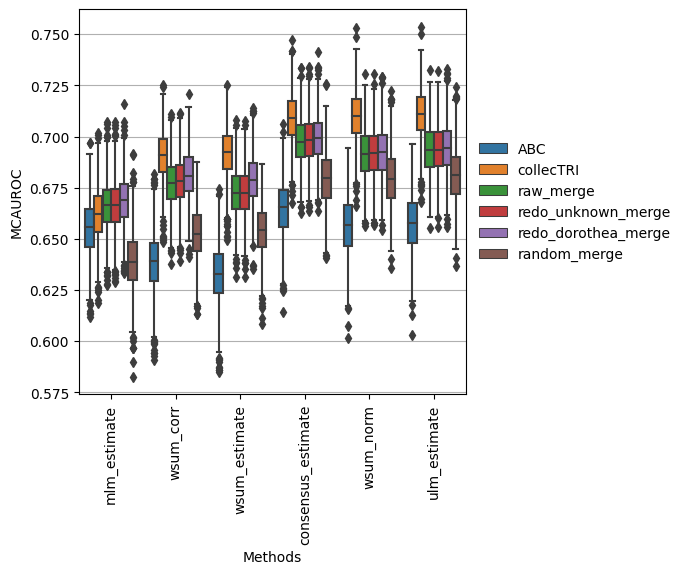

In [15]:
dc.plot_metrics_boxplot(df, metric='mcauroc', groupby='net')

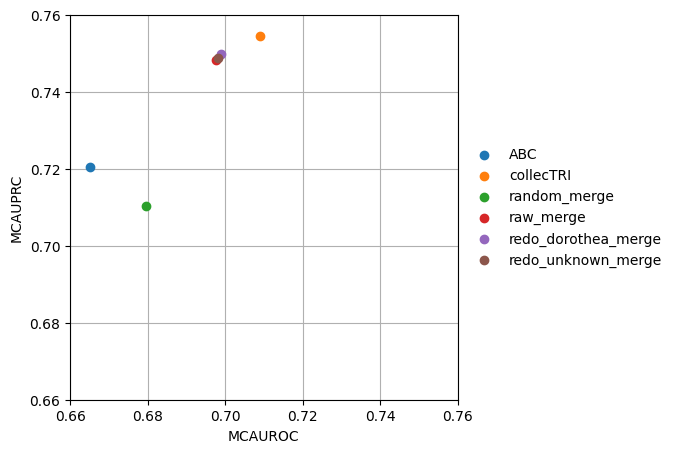

In [16]:
dc.plot_metrics_scatter(df[df['method'] == 'consensus_estimate'], groupby='net', x='mcauroc', y='mcauprc', show_text=False)

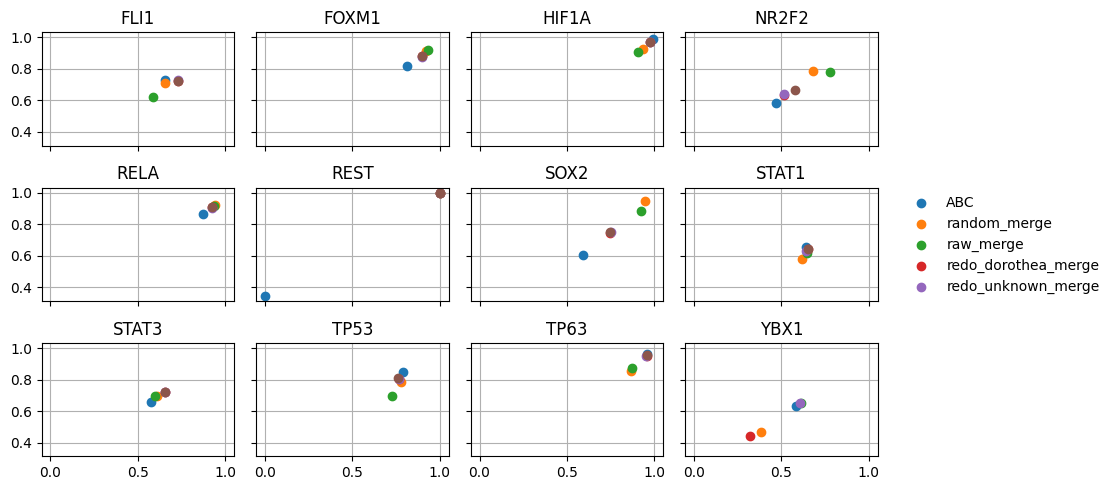

In [17]:
dc.plot_metrics_scatter_cols(df_merged_source[df_merged_source['method'] == 'consensus_estimate'], col='source', figsize=(9, 5), groupby='net')